K-Nearest Neighbors
Objectives
After completing this lab you will be able to:

Use K Nearest neighbors to classify data
In this Lab you will load a customer dataset, fit the data, and use K-Nearest Neighbors to predict a data point. But what is K-Nearest Neighbors?

K-Nearest Neighbors is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

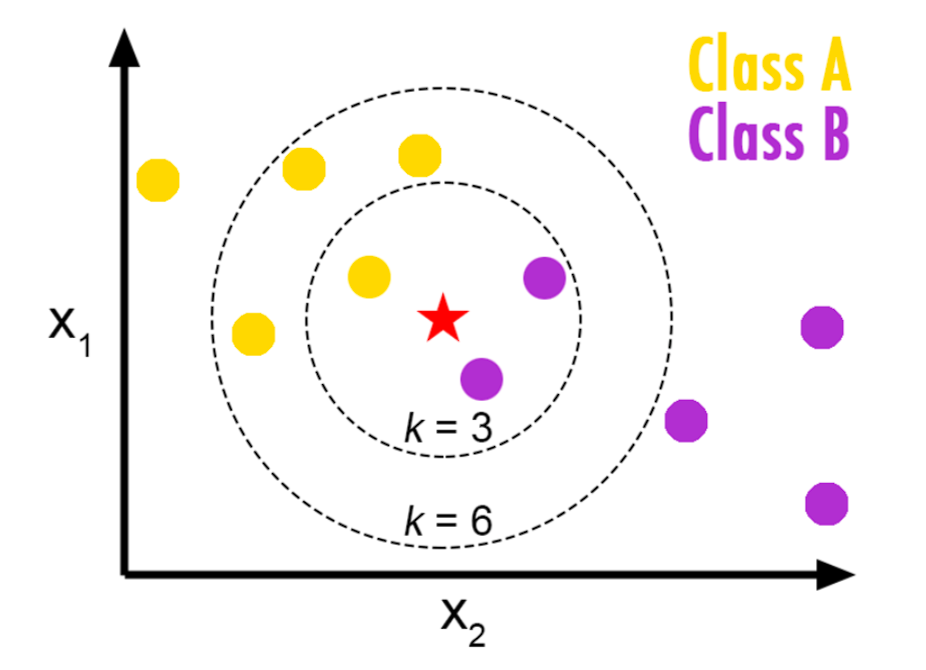

In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points) we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.

In this sense, it is important to consider the value of k. But hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (points) when it predicts the classification of the test point.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [3]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


**Getting to know to dataset**

In [4]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('------------------')	

region
region
3    344
2    334
1    322
Name: count, dtype: int64
------------------
tenure
tenure
72    31
24    20
48    20
3     20
13    19
      ..
36     7
2      7
47     7
21     6
63     6
Name: count, Length: 72, dtype: int64
------------------
age
age
33    39
39    35
35    34
31    32
34    32
37    31
40    28
42    28
30    26
52    25
36    25
54    24
45    24
43    24
27    24
48    24
46    24
41    24
51    23
25    23
50    23
28    22
26    21
55    21
47    21
32    21
38    21
24    20
57    20
44    20
29    19
53    19
49    18
23    16
22    15
59    14
63    12
56    11
61    11
60    11
64    10
20    10
58    10
62     9
21     8
66     7
68     6
69     6
65     6
67     5
19     4
76     3
70     3
75     2
71     1
72     1
74     1
77     1
18     1
73     1
Name: count, dtype: int64
------------------
marital
marital
0    505
1    495
Name: count, dtype: int64
------------------
address
address
1     68
2     66
4     61
3     61
0     56
7     53
5 

In [5]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [6]:
df.drop(["ed","employ"],axis=1,inplace=True)

In [7]:
df.head()

,region,tenure,age,marital,address,income,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,0.0,0,2,1
1,3,11,33,1,7,136.0,0.0,0,6,4
2,3,68,52,1,24,116.0,0.0,1,2,3
3,2,33,33,0,12,33.0,0.0,1,1,1
4,2,23,30,1,9,30.0,0.0,0,4,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   retire   1000 non-null   float64
 7   gender   1000 non-null   int64  
 8   reside   1000 non-null   int64  
 9   custcat  1000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 78.3 KB


**EDA**

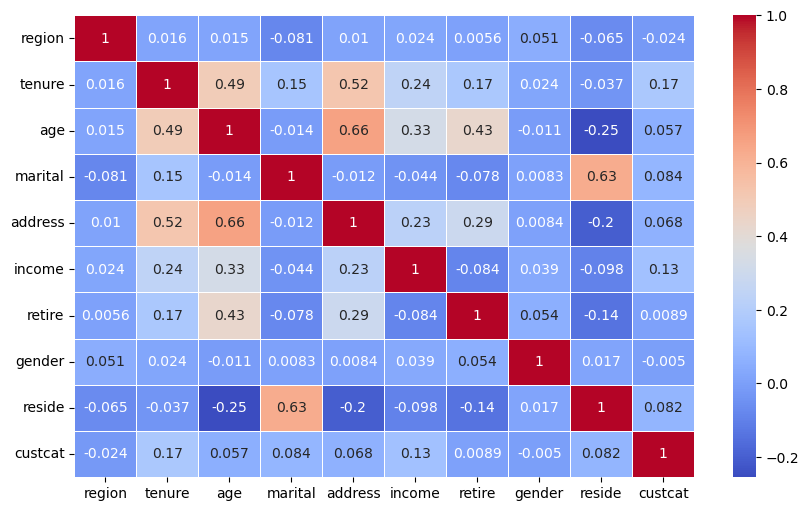

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap='coolwarm')
plt.show()


In [10]:
# drop the lowest correlated features of the dataset
df.drop(["retire", "gender"], axis=1, inplace=True)


In [11]:
df.head()

,region,tenure,age,marital,address,income,reside,custcat
0,2,13,44,1,9,64.0,2,1
1,3,11,33,1,7,136.0,6,4
2,3,68,52,1,24,116.0,2,3
3,2,33,33,0,12,33.0,1,1
4,2,23,30,1,9,30.0,4,3


In [12]:
region = pd.get_dummies(df['region'],drop_first=True,prefix = "region")
reside = pd.get_dummies(df['reside'],drop_first = True,prefix = "reside")

In [13]:
df.drop(['region','reside'],axis=1,inplace=True)

In [14]:
df = pd.concat([df,region,reside],axis=1)

This code is using the pd.concat function to concatenate (join) three DataFrames: df, region, and reside. Let's break down the code step by step:

DataFrames involved:

df: This is assumed to be an existing DataFrame.
region: This is another DataFrame, presumably containing data related to regions.
reside: This is yet another DataFrame, likely containing data related to residence.
Concatenation:

pd.concat([df, region, reside], axis=1): The pd.concat function is used to concatenate DataFrames along a particular axis. In this case, axis=1 indicates concatenation along columns.
Result:

The result is a new DataFrame that combines the columns of df, region, and reside side by side.
In-Place Concatenation:

df = pd.concat([df, region, reside], axis=1): The result is assigned back to the variable df. This means that the original DataFrame df is replaced with the new concatenated DataFrame.
In summary, the code combines three DataFrames (df, region, and reside) along columns, and the result is stored in the variable df. This can be useful when you have related information in separate DataFrames and want to combine them based on a common axis (in this case, columns).








In [15]:
df.head()

,tenure,age,marital,address,income,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,13,44,1,9,64.0,1,True,False,True,False,False,False,False,False,False
1,11,33,1,7,136.0,4,False,True,False,False,False,False,True,False,False
2,68,52,1,24,116.0,3,False,True,True,False,False,False,False,False,False
3,33,33,0,12,33.0,1,True,False,False,False,False,False,False,False,False
4,23,30,1,9,30.0,3,True,False,False,False,True,False,False,False,False


**Standardization of variables**

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaled_variabel = df[['tenure','age','address','income']]

In [18]:
scaled_variabel

,tenure,age,address,income
0,13,44,9,64.0
1,11,33,7,136.0
2,68,52,24,116.0
3,33,33,12,33.0
4,23,30,9,30.0
...,...,...,...,...
995,10,39,0,27.0
996,7,34,2,22.0
997,67,59,40,944.0
998,70,49,18,87.0


In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(scaled_variabel)

StandardScaler()

In [21]:
scaler_variabel = scaler.transform(scaled_variabel)

In [22]:
scaled_variabel.head()

,tenure,age,address,income
0,13,44,9,64.0
1,11,33,7,136.0
2,68,52,24,116.0
3,33,33,12,33.0
4,23,30,9,30.0


In [23]:
df_scaled = pd.DataFrame(scaler_variabel,columns=['tenure','age','address','income'])

In [24]:
df_scaled.head()    

,tenure,age,address,income
0,-1.055125,0.184505,-0.253034,-0.126506
1,-1.148806,-0.691812,-0.451415,0.546450
2,1.521092,0.821826,1.234819,0.359517
3,-0.118319,-0.691812,0.044536,-0.416251
4,-0.586722,-0.930808,-0.253034,-0.444291


In [25]:
df.head()

,tenure,age,marital,address,income,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,13,44,1,9,64.0,1,True,False,True,False,False,False,False,False,False
1,11,33,1,7,136.0,4,False,True,False,False,False,False,True,False,False
2,68,52,1,24,116.0,3,False,True,True,False,False,False,False,False,False
3,33,33,0,12,33.0,1,True,False,False,False,False,False,False,False,False
4,23,30,1,9,30.0,3,True,False,False,False,True,False,False,False,False


In [26]:
df.drop(['tenure','age','address','income'],axis=1,inplace=True)

In [27]:
df = pd.concat([df,df_scaled],axis=1)

In [28]:
df.head()

,marital,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8,tenure,age,address,income
0,1,1,True,False,True,False,False,False,False,False,False,-1.055125,0.184505,-0.253034,-0.126506
1,1,4,False,True,False,False,False,False,True,False,False,-1.148806,-0.691812,-0.451415,0.546450
2,1,3,False,True,True,False,False,False,False,False,False,1.521092,0.821826,1.234819,0.359517
3,0,1,True,False,False,False,False,False,False,False,False,-0.118319,-0.691812,0.044536,-0.416251
4,1,3,True,False,False,False,True,False,False,False,False,-0.586722,-0.930808,-0.253034,-0.444291


KNN Modelling

In [30]:
x = df.drop('custcat',axis=1)
y = df['custcat']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [33]:
print( "Train_set : ",X_train.shape,y_train.shape )
print( "Test_set : ",X_test.shape,y_test.shape )

Train_set :  (800, 14) (800,)
Test_set :  (200, 14) (200,)


In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
k = 4
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train,y_train)
knn_model

KNeighborsClassifier(n_neighbors=4)

In [36]:
y_pred = knn_model.predict(X_test)

In [38]:
from sklearn import metrics

# Assuming y_test and y_pred are your actual and predicted values
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred))


Accuracy Score: 0.325


In [39]:
k = 6
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train,y_train)
knn_model
y_pred = knn_model.predict(X_test)
from sklearn import metrics

# Assuming y_test and y_pred are your actual and predicted values
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred))


Accuracy Score: 0.335
